In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from datetime import datetime as dt

import tensorflow as tf
from tensorflow import keras

from module import DataLoader
import matplotlib.pyplot as plt
import pandas as pd

# 1. Data
- 해당의 데이터는 movielens 데이터이며, train_test_split 으로 나누어져 훈련용, 시험용 데이터로 나누어진다.
- generate_trainset, generate_testset 으로 인해 반환되는 값은 numpy array의 형식으로 X, y 로 반환된다.

In [3]:
loader = DataLoader()

X_train, y_train = loader.generate_trainset()
X_test, y_test = loader.generate_testset()

print("훈련 데이터 shape : {}, 훈련 라벨 갯수 : {}".format(X_train.shape, y_train.size))
print("테스트 데이터 shape : {}, 테스트 라벨 갯수 : {}".format(X_test.shape, y_test.size))

훈련 데이터 shape : (80003, 2), 훈련 라벨 갯수 : 80003
테스트 데이터 shape : (19259, 2), 테스트 라벨 갯수 : 19259


# 2. Multi-Layer Perceptron (MLP)

## 1. Generate MLP Model Process

In [9]:
# 1. Setting Value 
num_users = loader.num_users
num_items = loader.num_items
layers = list(map(int, [64,32,16,8]))
num_layers = len(layers)
regs = 0

In [8]:
# 2. 입력 층 생성
user_input = keras.Input(shape=(1,), dtype='int32')
item_input = keras.Input(shape=(1,), dtype='int32')

In [10]:
# 3. embedding 층 생성
user_embedding = keras.layers.Embedding(
                    num_users,
                    int(layers[0] / 2),
                    embeddings_regularizer=keras.regularizers.l2(regs),
                    name='user_emebedding')
item_embedding = keras.layers.Embedding(
                    num_items,
                    int(layers[0] / 2),
                    embeddings_regularizer=keras.regularizers.l2(regs),
                    name='item_emebedding')

### 1. 중간점검
- GMF는 행렬 분해의 사용자와 아이템 간의 선형적 관계를 나타내주는 모델이다. 이에 반해 MLP는 딥러닝의 구조에 더욱 가깝게 만들어 사용자와 아이템 간의 비선형적 관계를 정의해주는 모델로 나타난다.
- embedding 층에서의 차이로 시작된다. GMF 에서는 output data의 크기를 latent_features로 잡아주었지만, MLP에서는 layer의 수에 따라 설정한다. 그리고 이는 선택한 layer의 /2 로 연산하여 진행된다.

In [12]:
user_model = keras.Sequential()
item_model = keras.Sequential()

user_model.add(user_input)
user_model.add(user_embedding)

item_model.add(item_input)
item_model.add(item_embedding)

user_output = user_model(X_train[:, 0])
item_output = item_model(X_train[:, 1])

print("---- 사용자 ----")
print("입력 값: {}".format(X_train[0, 0]))
print("임베딩 층 출력 값: {}".format(user_output[0].numpy()))
print("훈련 데이터 shape: {}\n".format(user_output.shape))

print("---- 아이템 ----")
print("입력 값: {}".format(X_train[0, 1]))
print("임베딩 층 출력 값: {}".format(item_output[0].numpy()))
print("훈련 데이터 shape: {}".format(item_output.shape))

---- 사용자 ----
입력 값: 0
임베딩 층 출력 값: [[ 0.02145102  0.00771738  0.04148554  0.02837544  0.0038025   0.04565295
   0.0022187   0.0182195  -0.038604    0.02393243 -0.04549157 -0.0167102
   0.04742993 -0.03922838  0.01749488 -0.01192331 -0.03574052 -0.00861154
   0.01380399 -0.04590664  0.03940747  0.04992205  0.00161704  0.01464088
   0.01369803  0.02580658  0.02148838 -0.02892662 -0.02373182 -0.03000467
  -0.01070108 -0.00441805]]
훈련 데이터 shape: (80003, 1, 32)

---- 아이템 ----
입력 값: 0
임베딩 층 출력 값: [[ 0.04601807 -0.0161028   0.01793485  0.01815857 -0.04807954  0.00668582
  -0.03089207 -0.00896778  0.02385772  0.03594344  0.0294818  -0.04321555
   0.0080189   0.03203883 -0.02785861  0.02063647  0.03338015  0.04702636
   0.03556764 -0.03444388 -0.03620957 -0.02443733  0.0255453  -0.02926643
  -0.04778406  0.04643757 -0.00471929  0.00891502  0.0335073   0.03496692
   0.01547328  0.01658198]]
훈련 데이터 shape: (80003, 1, 32)


In [13]:
# 4. Flatten 층
user_latent = keras.layers.Flatten()
item_latent = keras.layers.Flatten()

user_model.add(user_latent)
item_model.add(item_latent)

user_output = user_model(X_train[:, 0])
item_output = item_model(X_train[:, 1])

print("---- 사용자 ----")
print("입력 값: {}".format(X_train[0, 0]))
print("임베딩 층 출력 값: {}".format(user_output[0].numpy()))
print("훈련 데이터 shape: {}\n".format(user_output.shape))

print("---- 아이템 ----")
print("입력 값: {}".format(X_train[0, 1]))
print("임베딩 층 출력 값: {}".format(item_output[0].numpy()))
print("훈련 데이터 shape: {}".format(item_output.shape))

---- 사용자 ----
입력 값: 0
임베딩 층 출력 값: [ 0.02145102  0.00771738  0.04148554  0.02837544  0.0038025   0.04565295
  0.0022187   0.0182195  -0.038604    0.02393243 -0.04549157 -0.0167102
  0.04742993 -0.03922838  0.01749488 -0.01192331 -0.03574052 -0.00861154
  0.01380399 -0.04590664  0.03940747  0.04992205  0.00161704  0.01464088
  0.01369803  0.02580658  0.02148838 -0.02892662 -0.02373182 -0.03000467
 -0.01070108 -0.00441805]
훈련 데이터 shape: (80003, 32)

---- 아이템 ----
입력 값: 0
임베딩 층 출력 값: [ 0.04601807 -0.0161028   0.01793485  0.01815857 -0.04807954  0.00668582
 -0.03089207 -0.00896778  0.02385772  0.03594344  0.0294818  -0.04321555
  0.0080189   0.03203883 -0.02785861  0.02063647  0.03338015  0.04702636
  0.03556764 -0.03444388 -0.03620957 -0.02443733  0.0255453  -0.02926643
 -0.04778406  0.04643757 -0.00471929  0.00891502  0.0335073   0.03496692
  0.01547328  0.01658198]
훈련 데이터 shape: (80003, 32)


#### GMF에서는 사용자와 아이템의 임베딩 층 출력 값을 곱해주는 Multiply 층을 거쳤지만, MLP에서는 두 벡터를 합쳐주는 concatenates 층을 활용하여 두 벡터의 특징을 합함

In [18]:
# 5. concat : layer 0, size : layer [0]
vector = keras.layers.Concatenate()
concatenates_output = vector([user_output, item_output])

print("---- 사용자 X 아이템 ----")
print("입력 값: {}".format(X_train[0, 0], X_train[0, 1]))
print("concatenate 층 출력 값: {}".format(concatenates_output[0].numpy()))
print("훈련 데이터 shape: {}\n".format(concatenates_output.shape))

---- 사용자 X 아이템 ----
입력 값: 0
concatenate 층 출력 값: [ 0.02145102  0.00771738  0.04148554  0.02837544  0.0038025   0.04565295
  0.0022187   0.0182195  -0.038604    0.02393243 -0.04549157 -0.0167102
  0.04742993 -0.03922838  0.01749488 -0.01192331 -0.03574052 -0.00861154
  0.01380399 -0.04590664  0.03940747  0.04992205  0.00161704  0.01464088
  0.01369803  0.02580658  0.02148838 -0.02892662 -0.02373182 -0.03000467
 -0.01070108 -0.00441805  0.04601807 -0.0161028   0.01793485  0.01815857
 -0.04807954  0.00668582 -0.03089207 -0.00896778  0.02385772  0.03594344
  0.0294818  -0.04321555  0.0080189   0.03203883 -0.02785861  0.02063647
  0.03338015  0.04702636  0.03556764 -0.03444388 -0.03620957 -0.02443733
  0.0255453  -0.02926643 -0.04778406  0.04643757 -0.00471929  0.00891502
  0.0335073   0.03496692  0.01547328  0.01658198]
훈련 데이터 shape: (80003, 64)



In [32]:
# 6. Hidden Layers : 1 ~ num_layer
model = keras.Sequential()
for index in range(num_layers):
    hidden_layer = keras.layers.Dense(
                    layers[index],
                    kernel_regularizer=keras.regularizers.l2(regs),
                    activation = keras.activations.relu,
                    name = "layer_{}".format(index)
                   )
    model.add(hidden_layer)
    
# 7. Dense Layer
output_layer = keras.layers.Dense(1,kernel_initializer=keras.initializers.lecun_uniform(),name="output")
model.add(output_layer)

output = model(concatenates_output)
print("---- MLP의 결과값은 사용자와 아이템 간의 비선형적 관계를 나타낸다. ----")
print(output.numpy())

---- MLP의 결과값은 사용자와 아이템 간의 비선형적 관계를 나타낸다. ----
[[ 1.7437774e-03]
 [-1.1439871e-03]
 [-2.1923371e-03]
 ...
 [-6.4805266e-05]
 [ 2.6360380e-03]
 [ 6.8094563e-03]]


## 2. Use

In [41]:
# 1. model setting
from model import MLP
model = MLP(loader.num_users, loader.num_items).get_model()

In [42]:
# 2. Callbacks
early_stop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# model_out_file = 'Pretrain/GMF_%s.h5' % (datetime.now().strftime('%Y-%m-%d-%h-%m-%s'))
# model_check_cb = keras.callbacks.ModelCheckpoint(model_out_file, save_best_only=True)

In [43]:
# 3. Compile
learner = "adam"
learning_rate = 0.001

if learner == "adagrad":
    model.compile(optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate), loss='mse')
elif learner == "rmsprop":
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate), loss='mse')
elif learner == "adam":
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
else:
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate), loss='mse')

In [44]:
# 4. Train
epochs = 20
batch_size = 256

history = model.fit(
            [X_train[:, 0], X_train[:, 1]], y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=([X_test[:, 0], X_test[:, 1]], y_test),
            callbacks=[early_stop_cb]
        )

Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 2.5009 - val_loss: 0.8063
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.7614 - val_loss: 0.7904
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.7217 - val_loss: 0.7777
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6912 - val_loss: 0.7705
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6667 - val_loss: 0.7717
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6373 - val_loss: 0.7771
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6015 - val_loss: 0.7894
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5617 - val_loss: 0.8029
Epoch 9/20
313/313 [==============================] - 2s 5ms/step - loss: 0.5218 - val_loss: 0.8250
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 0.4856 - val_loss: 0.8486

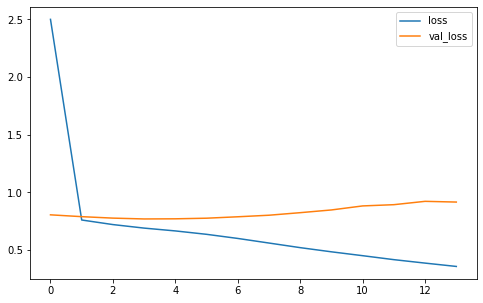

[4.2788687 3.5326097 3.5430448 3.2614565 4.0199037 3.6491005 3.8688595
 3.444198  4.0196033 2.0359871]
[5. 3. 4. 4. 5. 5. 5. 3. 4. 2.]


In [46]:
# 5. Result
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.show()
test_sample = X_test[:10]
test_sample_label = y_test[:10]
print(model.predict([test_sample[:, 0], test_sample[:, 1]]).flatten())
print(test_sample_label)